# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
from imageio.v3 import imread
import glob
import os
import matplotlib.pyplot as plt
import collections
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot
import pydotplus
from pydotplus import graphviz
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm
from gtts import gTTS
from tempfile import TemporaryFile
from IPython.display import Audio
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
!nvidia-smi

Wed Mar  1 11:02:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0    13W /  74W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [3]:
#Import the dataset and read the image into a seperate variable

#images="S:/PG DS/Final_Project/Project/Flickr/Images"
images="Flickr\\Images"

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))
all_imgs[:10]

The total images present in the dataset: 8091


['Flickr\\Images\\1000268201_693b08cb0e.jpg',
 'Flickr\\Images\\1001773457_577c3a7d70.jpg',
 'Flickr\\Images\\1002674143_1b742ab4b8.jpg',
 'Flickr\\Images\\1003163366_44323f5815.jpg',
 'Flickr\\Images\\1007129816_e794419615.jpg',
 'Flickr\\Images\\1007320043_627395c3d8.jpg',
 'Flickr\\Images\\1009434119_febe49276a.jpg',
 'Flickr\\Images\\1012212859_01547e3f17.jpg',
 'Flickr\\Images\\1015118661_980735411b.jpg',
 'Flickr\\Images\\1015584366_dfcec3c85a.jpg']

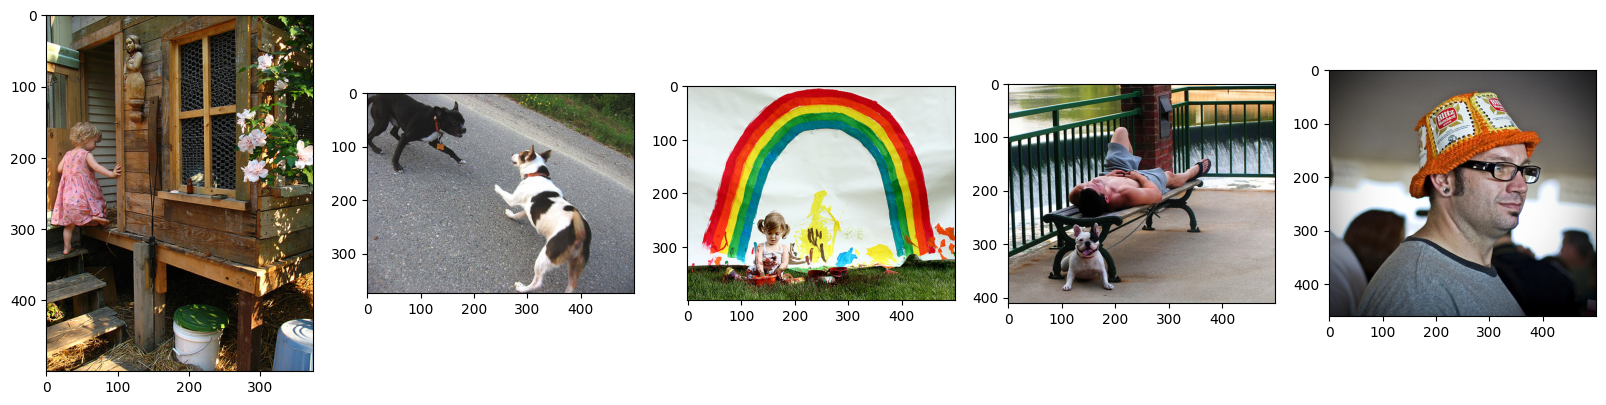

In [4]:
#Visualise both the images & text present in the dataset

figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, all_imgs[0:5]):
    ax.imshow(imread(image), cmap=None)

In [5]:
# Visualizing txt

file_path='./Flickr/captions.txt'

open_file = open(file_path, 'r')
text = open_file.read() 
display(text.split('\n')[:5])
display(text.split('\n')[-5:])
open_file.close()   

# to view the txt we know that first data is header and last data is spaces splitted by new line command \n
# so first converting the text to list and getting the count of valid sentenses only

print('\n\nNumber of captions in the text files are:',len(text.split('\n')[1:-1]))

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .']

['997722733_0cb5439472.jpg,A man is rock climbing high in the air .',
 '997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock face covered in assist handles .',
 '997722733_0cb5439472.jpg,A rock climber in a red shirt .',
 '997722733_0cb5439472.jpg,A rock climber practices on a rock climbing wall .',
 '']



Number of captions in the text files are: 40455


In [6]:
#Since the total number of images are 8091 and each image has 5 captions total number of captions is 40455

#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    
    return text

doc = load_doc(text_file)
print(doc[:300])

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [7]:
#Testing for the splitting function to form dataFrame
with open(file_path, 'r') as cap:
    next(cap) # to skip the heading 
    for line in cap:
        split_arr=line.split('\n') # to eliminate the '\n' characters from the array
        l1=split_arr[0].split(',')[0]
        l2=split_arr[0].split(',')[1]
        break
display(split_arr)
display(line)
print(l1)
print(l2)

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '']

'1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n'

1000268201_693b08cb0e.jpg
A child in a pink dress is climbing up a set of stairs in an entry way .


In [8]:
all_img_id=[] #store all the image id here
all_img_vector=[] #store all the image path here
annotations=[] #store all the captions here

with open(file_path,'r') as cap:
    next(cap) # to skip the heading 
    for line in cap:
        split_arr = line.split('\n')[0].split(',') # to eliminate the '\n' characters from the array
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1])
        all_img_vector.append(images+'\\'+all_img_id[-1])
        
    
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID                                     Path  \
0      1000268201_693b08cb0e.jpg  Flickr\Images\1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg  Flickr\Images\1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg  Flickr\Images\1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg  Flickr\Images\1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg  Flickr\Images\1000268201_693b08cb0e.jpg   
...                          ...                                      ...   
40450   997722733_0cb5439472.jpg   Flickr\Images\997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   Flickr\Images\997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   Flickr\Images\997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   Flickr\Images\997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   Flickr\Images\997722733_0cb5439472.jpg   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451           A man is rock climbing high in the air .  
40452  A person in a red shirt climbing up a rock fac...  
40453                    A rock climber in a red shirt .  
40454  A rock climber practices on a rock climbing wa...  

[40455 rows x 3 columns]

In [9]:
display(df.Captions[df.ID=='2425262733_afe0718276.jpg'].iloc[1])
display(df.Captions[df.ID=='2425262733_afe0718276.jpg'].iloc[0])
display(df.Captions[df.ID=='2933637854_984614e18b.jpg'].iloc[2])

'"A man in a hoodie skateboards in front of a blue sky and building '

'A kid wearing a brown hoodie doing an ollie .'

'"A man in an orange jersey with the letter "" 12 "" on it plays football ."'

In [10]:
# We could see that many sentenses have full stops at end are present and in few sentences there is double quotations present.
# hence we need to clean up these

df.Captions = df.Captions.apply(lambda x: x.rstrip('.') if '.' in x else x)
df.Captions = df.Captions.apply(lambda x: x[1:] if x[0]=='"' in x else x)
df.Captions = df.Captions.apply(lambda x: x[:-1] if x[-1]=='"' in x else x)
df.Captions = df.Captions.apply(lambda x: x[:-1] if x[-1]==' ' in x else x)

In [11]:
display(df.Captions[df.ID=='2425262733_afe0718276.jpg'].iloc[1])
display(df.Captions[df.ID=='2425262733_afe0718276.jpg'].iloc[0])
display(df.Captions[df.ID=='2933637854_984614e18b.jpg'].iloc[2])

'A man in a hoodie skateboards in front of a blue sky and building'

'A kid wearing a brown hoodie doing an ollie'

'A man in an orange jersey with the letter "" 12 "" on it plays football .'

In [12]:
#Create a list which contains all the captions
annotations=list(df.Captions)

#add the <start> & <end> token to all those captions as well
ann_tok = ['<start> '+line+' <end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path=list(df.Path)

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [13]:
ann_tok[:10]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> A girl going into a wooden building <end>',
 '<start> A little girl climbing into a wooden playhouse <end>',
 '<start> A little girl climbing the stairs to her playhouse <end>',
 '<start> A little girl in a pink dress going into a wooden cabin <end>',
 '<start> A black dog and a spotted dog are fighting <end>',
 '<start> A black dog and a tri-colored dog playing with each other on the road <end>',
 '<start> A black dog and a white dog with brown spots are staring at each other in the street <end>',
 '<start> Two dogs of different breeds looking at each other on the road <end>',
 '<start> Two dogs on pavement moving toward each other <end>']

In [14]:
#Create the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]

val_count=collections.Counter(vocabulary)
val_count

Counter({'a': 61430,
         'child': 1517,
         'in': 18182,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6496,
         'stairs': 109,
         'an': 2358,
         'entry': 1,
         'way': 48,
         'girl': 3284,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1750,
         'playhouse': 6,
         'the': 17676,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3627,
         'dog': 7956,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7308,
         'each': 399,
         'other': 667,
         'on': 10367,
         'road': 380,
         'white': 3710,
         'brown': 2471,
         'spots': 28,
         'staring': 57,
         'at': 2819,
         'stree

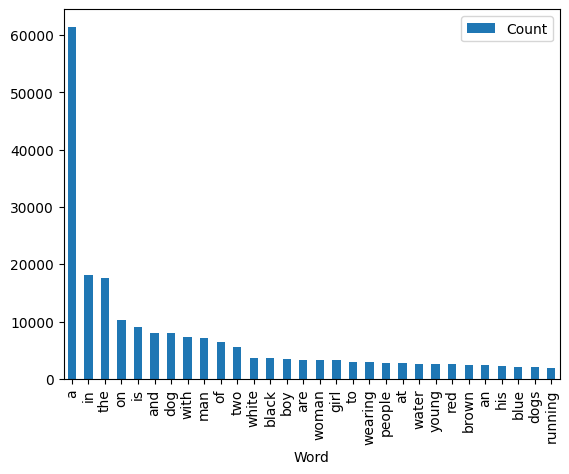

In [15]:
#Visualise the top 30 occuring words in the captions

pd.DataFrame(val_count.most_common(30),columns = ['Word', 'Count']).plot.bar(x='Word',y='Count')
plt.show()
#write your code here

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [16]:
# create the tokenizer
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000,oov_token='UNK',filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(ann_tok)
seq = tokenizer.texts_to_sequences(ann_tok)
#your code here

In [17]:
seq[:5]

[[3, 2, 44, 5, 2, 89, 173, 8, 116, 52, 2, 389, 13, 385, 5, 29, 1, 670, 4],
 [3, 2, 20, 313, 64, 2, 197, 120, 4],
 [3, 2, 39, 20, 116, 64, 2, 197, 2368, 4],
 [3, 2, 39, 20, 116, 6, 385, 21, 63, 2368, 4],
 [3, 2, 39, 20, 5, 2, 89, 173, 313, 64, 2, 197, 2887, 4]]

In [18]:
ann_tok[:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> A girl going into a wooden building <end>',
 '<start> A little girl climbing into a wooden playhouse <end>',
 '<start> A little girl climbing the stairs to her playhouse <end>',
 '<start> A little girl in a pink dress going into a wooden cabin <end>']

In [19]:
# Create word-to-index and index-to-word mappings.
word_index = tokenizer.word_index
index_word = tokenizer.index_word

# Add Pad Token
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
#your code here

In [20]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 61436),
             ('child', 1517),
             ('in', 18193),
             ('pink', 706),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 495),
             ('up', 1251),
             ('set', 106),
             ('of', 6504),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 51),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17677),
             ('to', 3008),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3641),
             ('dog', 7958),
             ('and', 8066),
             ('spotted', 37),
             ('are', 3365),
             ('fighting', 131),
             ('tri', 12),
             ('color

In [21]:
import pickle

with open('tokenizer.pkl',"wb") as f:
    pickle.dump(tokenizer,f)

In [22]:
dict(tokenizer.word_counts).values()

dict_values([40455, 61436, 1517, 18193, 706, 332, 9069, 495, 1251, 106, 6504, 109, 2358, 1, 51, 40455, 3284, 145, 1046, 278, 485, 1750, 6, 17677, 3008, 1102, 4, 3641, 7958, 8066, 37, 3365, 131, 12, 204, 1954, 7308, 399, 667, 10369, 389, 3728, 2484, 28, 57, 2820, 910, 5550, 2097, 44, 5, 683, 46, 40, 142, 348, 58, 561, 1322, 63, 17, 231, 29, 1322, 1210, 1264, 1565, 515, 3, 6, 370, 296, 14, 43, 2610, 757, 7172, 55, 360, 1818, 2255, 1168, 353, 27, 15, 13, 58, 714, 100, 43, 491, 182, 1211, 125, 333, 700, 635, 8, 329, 111, 184, 2, 2917, 1, 43, 37, 1, 6, 65, 238, 57, 2571, 2, 198, 135, 2, 204, 37, 198, 1996, 447, 51, 155, 319, 1979, 9, 30, 8, 1165, 906, 962, 36, 863, 358, 157, 165, 1018, 1682, 79, 2683, 1703, 17, 773, 289, 3534, 183, 3, 534, 309, 22, 23, 124, 1, 1126, 41, 112, 151, 553, 437, 1884, 2136, 207, 738, 200, 1379, 53, 233, 129, 67, 400, 2, 193, 1432, 33, 27, 1492, 1224, 60, 5, 63, 179, 82, 145, 893, 4, 1521, 7, 490, 247, 4, 901, 7, 2, 194, 1207, 2837, 1, 30, 27, 8, 448, 147, 841, 31

Count
a        61436
<start>  40455
<end>    40455
in       18193
the      17677
on       10369
is        9069
and       8066
dog       7958
with      7308
man       7172
of        6504
two       5550
white     3728
black     3641
boy       3534
are       3365
woman     3320
girl      3284
to        3008
wearing   2917
people    2837
at        2820
water     2683
young     2610
red       2571
brown     2484
an        2358
his       2255
blue      2136

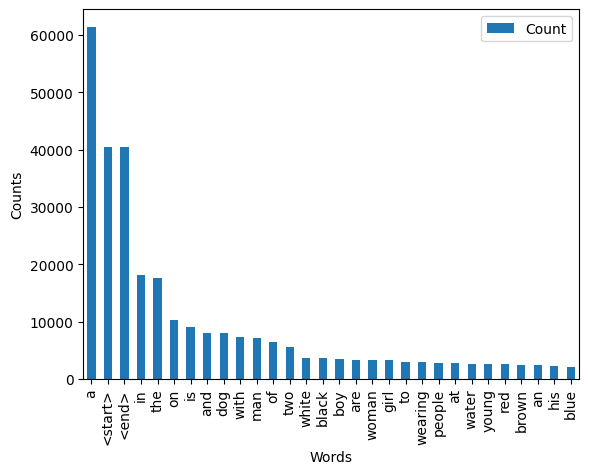

In [23]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
df_30 = pd.DataFrame(data=dict(tokenizer.word_counts).values(),index=dict(tokenizer.word_counts).keys(),columns=['Count']).sort_values('Count',ascending=False).head(30)
display(df_30)
df_30.plot(kind='bar',xlabel='Words',ylabel='Counts')
plt.show()
#your code here

In [24]:
# Pad each vector to the max_length of the captions ^ store it to a variable
max_length = max([len(s) for s in seq])
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(seq,padding='post',maxlen=max_length)  #your code here

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [25]:
#write your code here to create the dataset consisting of image paths
all_imgs[:5]

['Flickr\\Images\\1000268201_693b08cb0e.jpg',
 'Flickr\\Images\\1001773457_577c3a7d70.jpg',
 'Flickr\\Images\\1002674143_1b742ab4b8.jpg',
 'Flickr\\Images\\1003163366_44323f5815.jpg',
 'Flickr\\Images\\1007129816_e794419615.jpg']

In [26]:
#write your code here for creating the function. This function should return images & their path

def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path,name=None)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img,size=(299,299))
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None)
    
    return [img,image_path]

Size of image before preprocessing: (500, 375, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


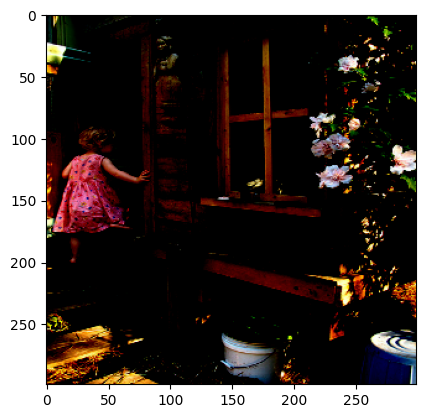

Path : Flickr\Images\1000268201_693b08cb0e.jpg
Size of image after preprocessing: (299, 299, 3)


In [27]:
# checking for an image sample

print('Size of image before preprocessing:',imread(all_imgs[0]).shape)
plt.imshow(load_image(all_imgs[0])[0])
plt.show()
print("Path :",load_image(all_imgs[0])[1])
print('Size of image after preprocessing:',load_image(all_imgs[0])[0].shape)

In [28]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

sorted_img_vector = sorted (set(all_img_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(sorted_img_vector)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)
image_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [29]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))

new_input = image_model.input#write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input,hidden_layer)#build the final model using both input & output layer
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [30]:
plot_model(image_features_extract_model, to_file='model.png',show_shapes=True)

In [31]:
import shutil
shutil.rmtree('./Flickr/Images')
shutil.copytree('./Flickr_Backup/Images', './Flickr/Images')

'./Flickr/Images'

In [32]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)


for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [01:00<00:00,  2.09it/s]


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [33]:
#write your code here

path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=101) #your code goes here)

In [34]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [35]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image,cap):# your input variable goes here):
  img_tensor = np.load(image.decode('utf-8')+'.npy')# write your code here to extract the features from the dictionary stored earlier
  return img_tensor,cap

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [36]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

def gen_dataset(image, caption,batch_size = 32,buffer_size=500):
    
    dataset = tf.data.Dataset.from_tensor_slices((image, caption))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
            map_func, [item1, item2], [tf.float32, tf.int32]),
            num_parallel_calls=tf.data.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(buffer_size).batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return dataset

In [37]:
BATCH_SIZE = 64
train_dataset=gen_dataset(path_train,cap_train,batch_size=BATCH_SIZE)
test_dataset=gen_dataset(path_test,cap_test,batch_size=BATCH_SIZE)

In [38]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [39]:
embedding_dim = 256 
units = 512
vocab_size = 5001#top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

### Encoder

In [40]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)#build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features)
        features = tf.nn.relu(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        
        return features

In [41]:
encoder=Encoder(embedding_dim)

### Attention model

In [42]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden,1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = self.V(tf.nn.tanh(self.W1(features)+self.W2(hidden_with_time_axis)))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = tf.nn.softmax(score,axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights*features#shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector,axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [43]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size,embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)#build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)#build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features,hidden)#create your context vector & attention weights from attention model
        embed =  self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  tf.concat([tf.expand_dims(context_vector,1),embed],axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [44]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [45]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 61436),
             ('child', 1517),
             ('in', 18193),
             ('pink', 706),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 495),
             ('up', 1251),
             ('set', 106),
             ('of', 6504),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 51),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17677),
             ('to', 3008),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3641),
             ('dog', 7958),
             ('and', 8066),
             ('spotted', 37),
             ('are', 3365),
             ('fighting', 131),
             ('tri', 12),
             ('color

In [46]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [47]:
optimizer = tf.keras.optimizers.SGD()#define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction='none')#define your loss object

In [48]:
acc_object = tf.keras.metrics.SparseCategoricalAccuracy()

In [49]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [50]:
def compute_accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    acc_ = acc_object(real, pred)
    mask = tf.cast(mask, dtype=acc_.dtype)
    acc_ *= mask
    return tf.reduce_mean(acc_)

In [51]:
checkpoint_path = "./train_SGD"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=None,checkpoint_name='Model_training_checkpoint')

In [52]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [53]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    acc = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden) 
            loss+=loss_function(target[:,i],predictions)
            acc+=compute_accuracy(target[:,i],predictions)
                
            dec_input=tf.expand_dims(target[:,i],1)
        
        avg_loss = loss/int(target.shape[1])
        avg_acc = acc/int(target.shape[1])
        trainable_variables = encoder.trainable_variables+decoder.trainable_variables
        gradients = tape.gradient(loss,trainable_variables)
        optimizer.apply_gradients(zip(gradients,trainable_variables))
        
    return loss, avg_loss, acc, avg_acc

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [54]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']]*target.shape[0],1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss+=loss_function(target[:,i],predictions)
            dec_input=tf.expand_dims(target[:,i],1)
        
        avg_loss=loss/int(target.shape[1])
        
    
    #write your code here to do the testing steps
        
    return loss, avg_loss

In [55]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch,(img_tensor,target)) in enumerate(test_dataset):
        batch_loss,t_loss = test_step(img_tensor,target)
        total_loss+=t_loss
        avg_test_loss = total_loss/test_num_steps
    
    return avg_test_loss

In [56]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    total_acc = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss, batch_acc, t_acc = train_step(img_tensor, target)
        total_loss += t_loss
        total_acc += t_acc
        avg_train_loss=total_loss / train_num_steps
        #avg_train_acc = total_acc / train_num_steps
        
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    #print ('For epoch: {}, \nthe train loss is {:.3f}, & test loss is {:.3f} \nthe train Accuracy is {:.3f}'.format(epoch+1,avg_train_loss,test_loss,avg_train_acc))
    print ('For epoch: {}, \nthe train loss is {:.3f}, & test loss is {:.3f} '.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  3%|██▋                                                                             | 1/30 [03:07<1:30:49, 187.90s/it]

For epoch: 1, 
the train loss is 1.809, & test loss is 1.728 
Time taken for 1 epoch 187.74428343772888 sec

Test loss has been reduced from 100.000 to 1.728


  7%|█████▎                                                                          | 2/30 [04:42<1:01:58, 132.80s/it]

For epoch: 2, 
the train loss is 1.678, & test loss is 1.644 
Time taken for 1 epoch 94.13305592536926 sec

Test loss has been reduced from 1.728 to 1.644


 10%|████████▏                                                                         | 3/30 [06:16<51:52, 115.29s/it]

For epoch: 3, 
the train loss is 1.600, & test loss is 1.586 
Time taken for 1 epoch 94.35258221626282 sec

Test loss has been reduced from 1.644 to 1.586


 13%|██████████▉                                                                       | 4/30 [07:50<46:18, 106.86s/it]

For epoch: 4, 
the train loss is 1.551, & test loss is 1.538 
Time taken for 1 epoch 93.84391760826111 sec

Test loss has been reduced from 1.586 to 1.538


 17%|█████████████▋                                                                    | 5/30 [09:24<42:35, 102.21s/it]

For epoch: 5, 
the train loss is 1.494, & test loss is 1.473 
Time taken for 1 epoch 93.86224842071533 sec

Test loss has been reduced from 1.538 to 1.473


 20%|████████████████▌                                                                  | 6/30 [10:58<39:48, 99.54s/it]

For epoch: 6, 
the train loss is 1.439, & test loss is 1.437 
Time taken for 1 epoch 94.23049759864807 sec

Test loss has been reduced from 1.473 to 1.437


 23%|███████████████████▎                                                               | 7/30 [12:34<37:38, 98.18s/it]

For epoch: 7, 
the train loss is 1.389, & test loss is 1.374 
Time taken for 1 epoch 95.29050421714783 sec

Test loss has been reduced from 1.437 to 1.374


 27%|██████████████████████▏                                                            | 8/30 [14:08<35:30, 96.84s/it]

For epoch: 8, 
the train loss is 1.340, & test loss is 1.340 
Time taken for 1 epoch 93.84065556526184 sec

Test loss has been reduced from 1.374 to 1.340


 30%|████████████████████████▉                                                          | 9/30 [15:42<33:34, 95.91s/it]

For epoch: 9, 
the train loss is 1.292, & test loss is 1.282 
Time taken for 1 epoch 93.78780317306519 sec

Test loss has been reduced from 1.340 to 1.282


 33%|███████████████████████████▎                                                      | 10/30 [17:17<31:53, 95.66s/it]

For epoch: 10, 
the train loss is 1.243, & test loss is 1.266 
Time taken for 1 epoch 95.0066545009613 sec

Test loss has been reduced from 1.282 to 1.266


 37%|██████████████████████████████                                                    | 11/30 [18:51<30:10, 95.30s/it]

For epoch: 11, 
the train loss is 1.204, & test loss is 1.222 
Time taken for 1 epoch 94.37255597114563 sec

Test loss has been reduced from 1.266 to 1.222


 40%|████████████████████████████████▊                                                 | 12/30 [20:29<28:51, 96.18s/it]

For epoch: 12, 
the train loss is 1.167, & test loss is 1.212 
Time taken for 1 epoch 98.07121348381042 sec

Test loss has been reduced from 1.222 to 1.212


 43%|███████████████████████████████████▌                                              | 13/30 [22:05<27:10, 95.88s/it]

For epoch: 13, 
the train loss is 1.143, & test loss is 1.208 
Time taken for 1 epoch 95.09999322891235 sec

Test loss has been reduced from 1.212 to 1.208


 47%|██████████████████████████████████████▎                                           | 14/30 [23:39<25:25, 95.31s/it]

For epoch: 14, 
the train loss is 1.118, & test loss is 1.174 
Time taken for 1 epoch 93.89587783813477 sec

Test loss has been reduced from 1.208 to 1.174


 50%|█████████████████████████████████████████                                         | 15/30 [25:13<23:47, 95.20s/it]

For epoch: 15, 
the train loss is 1.100, & test loss is 1.160 
Time taken for 1 epoch 94.82258296012878 sec

Test loss has been reduced from 1.174 to 1.160


 53%|███████████████████████████████████████████▋                                      | 16/30 [26:49<22:12, 95.18s/it]

For epoch: 16, 
the train loss is 1.084, & test loss is 1.153 
Time taken for 1 epoch 95.0349280834198 sec

Test loss has been reduced from 1.160 to 1.153


 57%|██████████████████████████████████████████████▍                                   | 17/30 [28:22<20:31, 94.76s/it]

For epoch: 17, 
the train loss is 1.061, & test loss is 1.144 
Time taken for 1 epoch 93.67227983474731 sec

Test loss has been reduced from 1.153 to 1.144


 60%|█████████████████████████████████████████████████▏                                | 18/30 [29:56<18:53, 94.46s/it]

For epoch: 18, 
the train loss is 1.044, & test loss is 1.116 
Time taken for 1 epoch 93.68819499015808 sec

Test loss has been reduced from 1.144 to 1.116


 63%|███████████████████████████████████████████████████▉                              | 19/30 [31:34<17:30, 95.50s/it]

For epoch: 19, 
the train loss is 1.026, & test loss is 1.107 
Time taken for 1 epoch 97.80478286743164 sec

Test loss has been reduced from 1.116 to 1.107


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [33:24<16:37, 99.74s/it]

For epoch: 20, 
the train loss is 1.018, & test loss is 1.104 
Time taken for 1 epoch 109.53382325172424 sec

Test loss has been reduced from 1.107 to 1.104


 70%|████████████████████████████████████████████████████████▋                        | 21/30 [35:13<15:22, 102.54s/it]

For epoch: 21, 
the train loss is 0.997, & test loss is 1.098 
Time taken for 1 epoch 108.95824646949768 sec

Test loss has been reduced from 1.104 to 1.098


 73%|███████████████████████████████████████████████████████████▍                     | 22/30 [37:01<13:55, 104.38s/it]

For epoch: 22, 
the train loss is 0.986, & test loss is 1.105 
Time taken for 1 epoch 108.65930485725403 sec



 77%|██████████████████████████████████████████████████████████████                   | 23/30 [38:50<12:19, 105.66s/it]

For epoch: 23, 
the train loss is 0.985, & test loss is 1.085 
Time taken for 1 epoch 108.5339286327362 sec

Test loss has been reduced from 1.098 to 1.085


 80%|████████████████████████████████████████████████████████████████▊                | 24/30 [40:39<10:39, 106.59s/it]

For epoch: 24, 
the train loss is 0.962, & test loss is 1.080 
Time taken for 1 epoch 108.64172220230103 sec

Test loss has been reduced from 1.085 to 1.080


 83%|███████████████████████████████████████████████████████████████████▌             | 25/30 [42:28<08:56, 107.26s/it]

For epoch: 25, 
the train loss is 0.946, & test loss is 1.085 
Time taken for 1 epoch 108.82072925567627 sec



 87%|██████████████████████████████████████████████████████████████████████▏          | 26/30 [44:17<07:10, 107.73s/it]

For epoch: 26, 
the train loss is 0.933, & test loss is 1.064 
Time taken for 1 epoch 108.74736261367798 sec

Test loss has been reduced from 1.080 to 1.064


 90%|████████████████████████████████████████████████████████████████████████▉        | 27/30 [46:06<05:24, 108.16s/it]

For epoch: 27, 
the train loss is 0.922, & test loss is 1.070 
Time taken for 1 epoch 109.14183831214905 sec



 93%|███████████████████████████████████████████████████████████████████████████▌     | 28/30 [47:55<03:36, 108.43s/it]

For epoch: 28, 
the train loss is 0.911, & test loss is 1.066 
Time taken for 1 epoch 109.0584135055542 sec



 97%|██████████████████████████████████████████████████████████████████████████████▎  | 29/30 [49:44<01:48, 108.56s/it]

For epoch: 29, 
the train loss is 0.898, & test loss is 1.074 
Time taken for 1 epoch 108.86928129196167 sec



100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [51:32<00:00, 103.09s/it]

For epoch: 30, 
the train loss is 0.991, & test loss is 1.061 
Time taken for 1 epoch 108.63730669021606 sec

Test loss has been reduced from 1.064 to 1.061


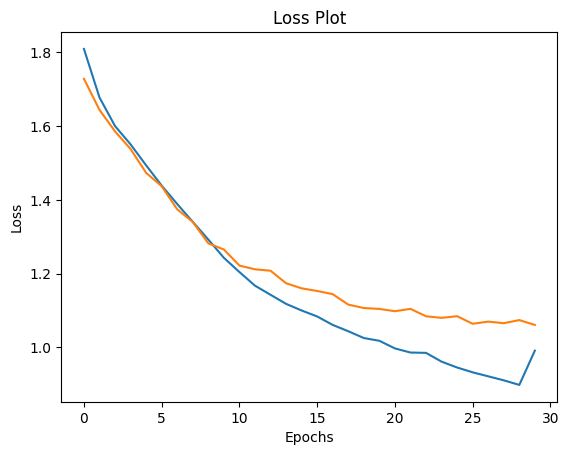

In [57]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [58]:
image_features_extract_model.save('./image_features_extract_model_SGD.h5')

In [59]:
loaded_model = tf.keras.models.load_model('./image_features_extract_model_SGD.h5')

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [60]:
attention_features_shape = 64
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = loaded_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,features,hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions,1)[0][0].numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [61]:
def beam_evaluate(image, beam_index = 5):
    result=[[[tokenizer.word_index['<start>']],0.]]
    #write your code to evaluate the result using beam search
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = loaded_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    
    while (len(result[0][0])<max_length):
        for i,s in enumerate(result):
            temp=[]
            predictions, hidden, attention_weights = decoder(dec_input,features,hidden)# get the output from decoder
    
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

            words = np.argsort(predictions[0])[-beam_index:]
            
            for w in words:
        
                next_ ,probab = s[0][:],s[1]
                next_.append(w)
                
                probab+=np.log(predictions[0][w])
                temp.append([next_,probab])
        result = temp
        result = sorted(result,key=lambda l:l[1])
        result = result[-beam_index:]
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        if (pred_list[-1]!=beam_index):
            dec_input = tf.expand_dims([pred_list[-1]],0)
        else:
            break
                
    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)

        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [62]:
from PIL import Image
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [63]:
from nltk.translate.bleu_score import sentence_bleu

In [64]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [65]:
def tts(captions):
    tts = gTTS(text=captions, lang='en')
    f = TemporaryFile()
    tts.write_to_fp(f)
    f.seek(0)
    Audio(f.read(), autoplay=True)
    time.sleep(len(captions.split())/1.5) 
    return 

Real Caption: a young girl wearing black boots holds onto the fence and has a lollipop
Prediction Caption: a young girl runs off
BELU score: 9.917933293295194


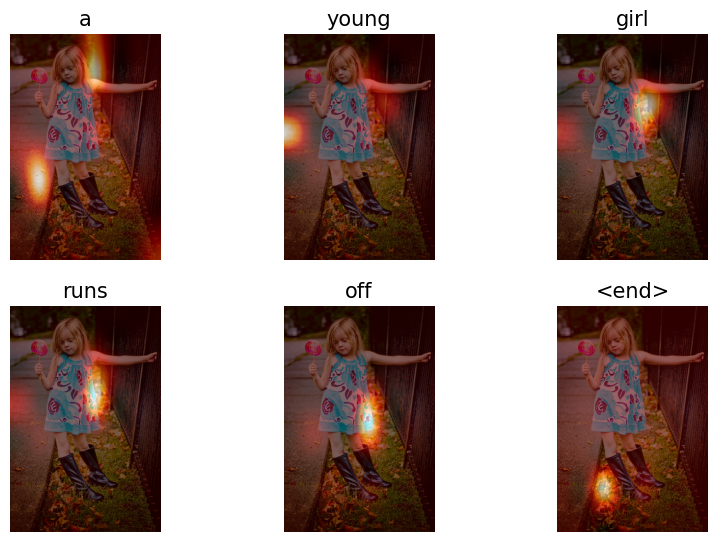

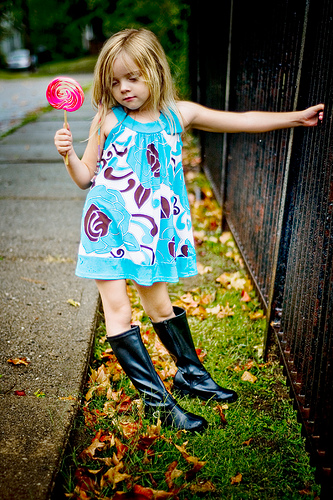

In [66]:
img_test = path_test
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join(tokenizer.index_word[i] for i in cap_test[rid] if i not in [0])
result, attention_plot,pred_test = evaluate(test_image)

real_caption=filt_text(real_caption)      

pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = [real_caption.split()]
#real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)


score = sentence_bleu(reference, candidate, weights=(1,0,0,0))
print(f"BELU score: {score*100}")

plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [67]:
tts = gTTS(text=pred_caption, lang='en')
f = TemporaryFile()
tts.write_to_fp(f)
f.seek(0)
Audio(f.read(), autoplay=True)

Predicted image caption through Beam search: a young girl on the background


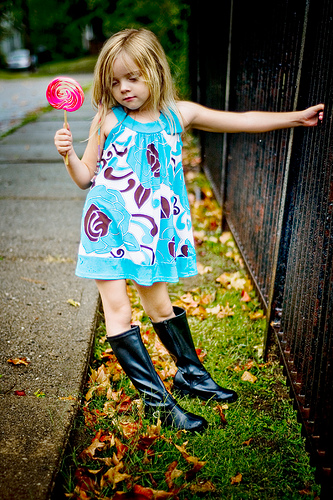

In [68]:
f.close()
captions=beam_evaluate(test_image)
print('Predicted image caption through Beam search:', captions)
Image.open(test_image)

In [69]:
tts = gTTS(text=captions, lang='en')
f = TemporaryFile()
tts.write_to_fp(f)
f.seek(0)
Audio(f.read(), autoplay=True)

In [70]:
f.close()